# **Data Pre-processing**

## Countries: China, USA, Brazil, Indonesia
## Crops: Rice, Wheat, Corn, Soya Beans
## Year: 2000-2021


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.sparse import hstack, csr_matrix

In [2]:
import warnings
# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Crop_Production

In [3]:
Crop_Production_df = pd.read_csv("Crop_Production.csv")
Crop_Production_df.drop(['Domain Code', 'Domain', 'Area Code (M49)', 'Element Code',
                         'Item Code (CPC)', 'Year Code', 'Flag', 'Flag Description', 'Note'], axis=1,inplace=True)
Crop_Production_df = Crop_Production_df[Crop_Production_df['Year'].between(2000, 2021)]
Crop_Production_df.rename(columns={'Area': 'Country','Element': 'Prod_type', 'Item': 'Crop_Name', 'Value': 'Crop_Production_Value',
                                   'Unit': 'Crop_Production_Unit'}, inplace=True)

Crop_Production_df.head()

,Country,Prod_type,Crop_Name,Year,Crop_Production_Unit,Crop_Production_Value
0,Brazil,Area harvested,Maize (corn),2000,ha,11890376.0
1,Brazil,Yield,Maize (corn),2000,100 g/ha,27182.0
2,Brazil,Production,Maize (corn),2000,t,32321000.0
3,Brazil,Area harvested,Maize (corn),2001,ha,12335175.0
4,Brazil,Yield,Maize (corn),2001,100 g/ha,34019.0


In [4]:
unique_values = Crop_Production_df['Year'].unique()
print(unique_values)

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020 2021]


### *Pivoting the Prod_type Column*

In [5]:
Crop_Production_df['Prod_type'] = Crop_Production_df['Prod_type'] + '_' + Crop_Production_df['Crop_Production_Unit']


# Pivot the DataFrame
Crop_Production_pivot_df = Crop_Production_df.pivot(index=['Country', 'Crop_Name', 'Year'], columns='Prod_type', values='Crop_Production_Value').reset_index()

# Rename columns
Crop_Production_pivot_df.columns.name = None

# Display the pivoted DataFrame
Crop_Production_pivot_df.head()

,Country,Crop_Name,Year,Area harvested_ha,Production_t,Yield_100 g/ha
0,Brazil,Maize (corn),2000,11890376.0,32321000.0,27182.0
1,Brazil,Maize (corn),2001,12335175.0,41962475.0,34019.0
2,Brazil,Maize (corn),2002,11760965.0,35940832.0,30559.0
3,Brazil,Maize (corn),2003,12965678.0,48327323.0,37273.0
4,Brazil,Maize (corn),2004,12410677.0,41787558.0,33671.0


In [6]:
null_values_count = Crop_Production_pivot_df.isnull().sum()
print(null_values_count)

Country              0
Crop_Name            0
Year                 0
Area harvested_ha    0
Production_t         0
Yield_100 g/ha       0
dtype: int64


In [7]:
# Data Types Check
print("Data Types Check:")
print(Crop_Production_pivot_df.dtypes)
print("\n")

Data Types Check:
Country               object
Crop_Name             object
Year                   int64
Area harvested_ha    float64
Production_t         float64
Yield_100 g/ha       float64
dtype: object




In [8]:
# Data Distribution Check
print("Data Distribution Check:")
print(Crop_Production_pivot_df.describe())
print("\n")

Data Distribution Check:
              Year  Area harvested_ha  Production_t  Yield_100 g/ha
count   330.000000       3.300000e+02  3.300000e+02      330.000000
mean   2010.500000       1.601580e+07  8.174163e+07    44924.400000
std       6.353923       1.255783e+07  9.084828e+07    23406.333719
min    2000.000000       1.453390e+05  2.150000e+05    12181.000000
25%    2005.000000       2.981724e+06  1.162225e+07    27743.500000
50%    2010.500000       1.371209e+07  5.443687e+07    42209.000000
75%    2016.000000       2.860851e+07  1.151685e+08    57681.750000
max    2021.000000       4.499575e+07  4.122622e+08   117433.000000




- In the pre-processing steps for the Crop Production table, we began by unpivoting the data to transform it into a more structured format, with separate columns for area harvested, yield, and production. 
- Following this, we conducted a series of checks to ensure data integrity and readiness for analysis. These included verifying data types to ensure consistency, examining data distributions to identify any outliers.

## Crop_Trade

In [9]:
Crop_Trade_df = pd.read_csv("Crop_Trade.csv")
Crop_Trade_df.drop(['Domain Code', 'Domain', 'Area Code (M49)', 'Element Code',
                         'Item Code (CPC)', 'Year Code', 'Flag', 'Flag Description', 'Note'], axis=1,inplace=True)
Crop_Trade_df = Crop_Trade_df[Crop_Trade_df['Year'].between(2000, 2021)]
Crop_Trade_df.rename(columns={'Area': 'Country', 'Element': 'Trade_type', 'Item': 'Crop_Name', 
                              'Value': 'Trade_Value',  'Unit': 'Trade_Unit'}, inplace=True)

Crop_Trade_df.head()

,Country,Trade_type,Crop_Name,Year,Trade_Unit,Trade_Value
0,Brazil,Import Quantity,Maize (corn),2000,t,1771194.0
1,Brazil,Import Value,Maize (corn),2000,1000 USD,201960.0
2,Brazil,Export Quantity,Maize (corn),2000,t,6699.0
3,Brazil,Export Value,Maize (corn),2000,1000 USD,9366.0
4,Brazil,Import Quantity,Maize (corn),2001,t,624362.0


In [10]:
unique_values = Crop_Trade_df['Year'].unique()
print(unique_values)

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020 2021]


### *Pivoting the Trade_type Column*

In [11]:
Crop_Trade_df['Trade_type'] = Crop_Trade_df['Trade_type'] + '_' + Crop_Trade_df['Trade_Unit']


# Pivot the DataFrame
Crop_Trade_pivot_df = Crop_Trade_df.pivot(index=['Country', 'Crop_Name', 'Year'], columns='Trade_type', values='Trade_Value').reset_index()

# Rename columns
Crop_Trade_pivot_df.columns.name = None

# Display the pivoted DataFrame
Crop_Trade_pivot_df.head()

,Country,Crop_Name,Year,Export Quantity_t,Export Value_1000 USD,Import Quantity_t,Import Value_1000 USD
0,Brazil,Maize (corn),2000,6699.0,9366.0,1771194.0,201960.0
1,Brazil,Maize (corn),2001,5628978.0,497328.0,624362.0,62044.0
2,Brazil,Maize (corn),2002,2746990.0,267597.0,345256.0,34758.0
3,Brazil,Maize (corn),2003,3566232.0,375136.0,797670.0,70605.0
4,Brazil,Maize (corn),2004,5030999.0,597336.0,330490.0,35927.0


In [12]:
# Data Types Check
print("Data Types Check:")
print(Crop_Trade_pivot_df.dtypes)
print("\n")

Data Types Check:
Country                   object
Crop_Name                 object
Year                       int64
Export Quantity_t        float64
Export Value_1000 USD    float64
Import Quantity_t        float64
Import Value_1000 USD    float64
dtype: object




In [13]:
null_values_count = Crop_Trade_pivot_df.isnull().sum()
print(null_values_count)

Country                  0
Crop_Name                0
Year                     0
Export Quantity_t        2
Export Value_1000 USD    2
Import Quantity_t        0
Import Value_1000 USD    0
dtype: int64


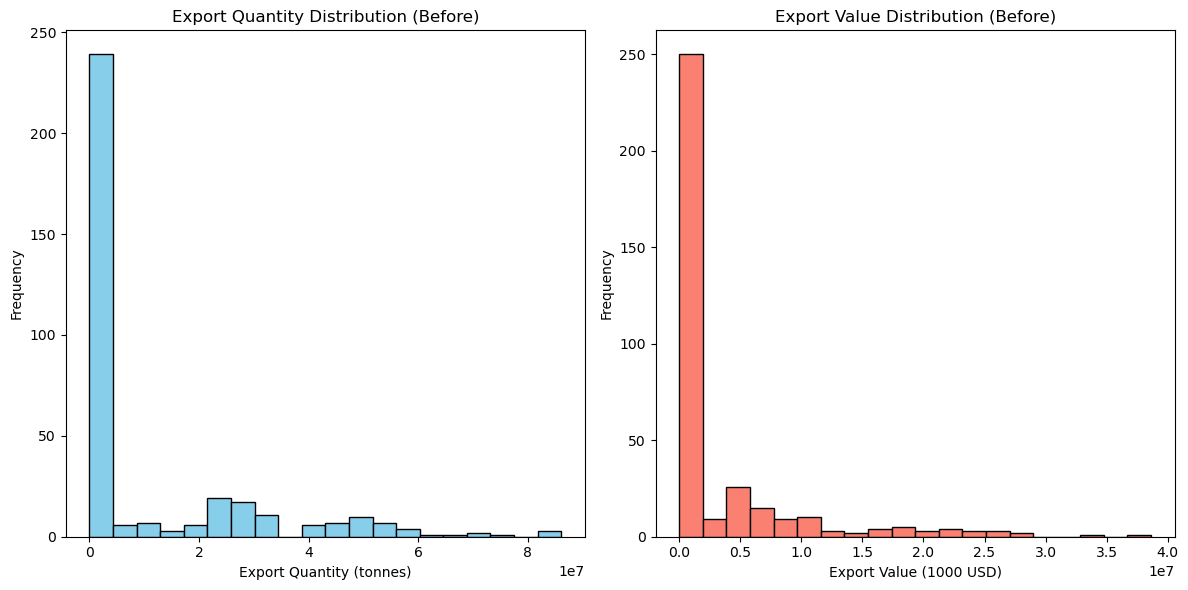

In [14]:
# Visualize distribution before handling missing values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(Crop_Trade_pivot_df["Export Quantity_t"], bins=20, color='skyblue', edgecolor='black')
plt.title('Export Quantity Distribution (Before)')
plt.xlabel('Export Quantity (tonnes)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(Crop_Trade_pivot_df["Export Value_1000 USD"], bins=20, color='salmon', edgecolor='black')
plt.title('Export Value Distribution (Before)')
plt.xlabel('Export Value (1000 USD)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [15]:
# Fill missing values with appropriate methods (e.g., mean, median, zero)
Crop_Trade_pivot_df["Export Quantity_t"].fillna(Crop_Trade_pivot_df["Export Quantity_t"].mean(), inplace=True)
Crop_Trade_pivot_df["Export Value_1000 USD"].fillna(0, inplace=True)  # Assuming missing values indicate zero export value

# Check if there are any remaining missing values
missing_values = Crop_Trade_pivot_df.isnull().sum()
print("Remaining missing values:")
print(missing_values)


Remaining missing values:
Country                  0
Crop_Name                0
Year                     0
Export Quantity_t        0
Export Value_1000 USD    0
Import Quantity_t        0
Import Value_1000 USD    0
dtype: int64


Summary statistics after handling missing values:
             Year  Export Quantity_t  Export Value_1000 USD  \
count   352.00000       3.520000e+02           3.520000e+02   
mean   2010.50000       1.120090e+07           3.203444e+06   
std       6.35332       1.879364e+07           6.419984e+06   
min    2000.00000       0.000000e+00           0.000000e+00   
25%    2005.00000       1.203767e+04           4.288250e+03   
50%    2010.50000       2.667183e+05           9.543250e+04   
75%    2016.00000       2.189054e+07           4.129606e+06   
max    2021.00000       8.610979e+07           3.863873e+07   

       Import Quantity_t  Import Value_1000 USD  
count       3.520000e+02           3.520000e+02  
mean        5.574485e+06           2.122109e+06  
std         1.539229e+07           7.182268e+06  
min         0.000000e+00           0.000000e+00  
25%         1.114752e+05           3.051150e+04  
50%         1.120820e+06           3.007495e+05  
75%         4.564586e+06        

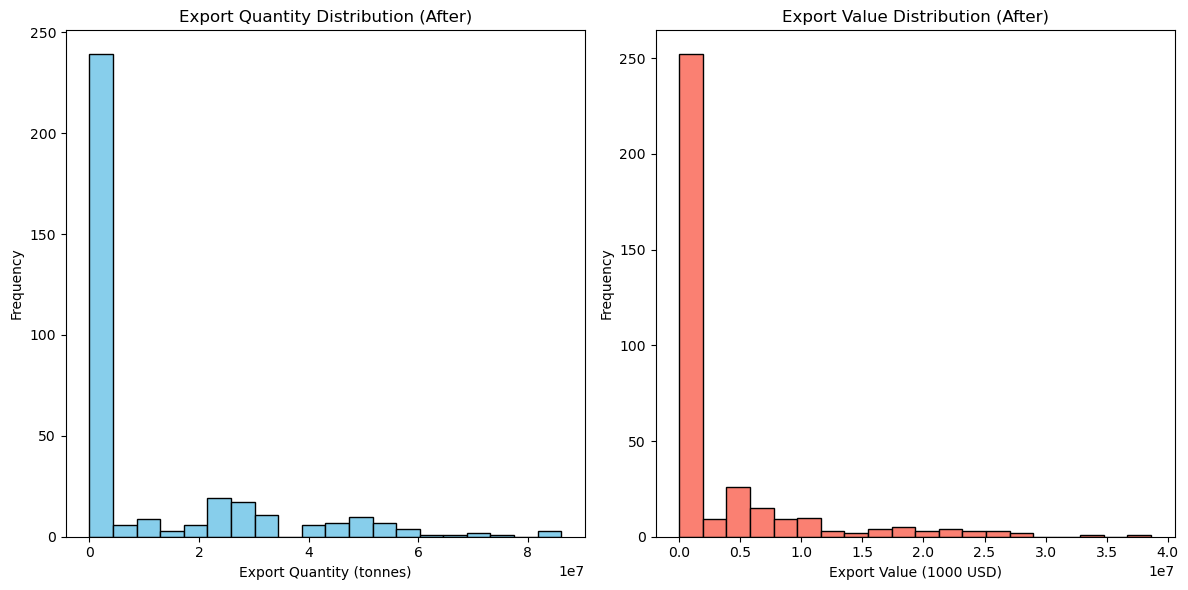

In [16]:
# Summary statistics after handling missing values
print("Summary statistics after handling missing values:")
print(Crop_Trade_pivot_df.describe())
print("\n")

# Visualize distribution after handling missing values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(Crop_Trade_pivot_df["Export Quantity_t"], bins=20, color='skyblue', edgecolor='black')
plt.title('Export Quantity Distribution (After)')
plt.xlabel('Export Quantity (tonnes)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(Crop_Trade_pivot_df["Export Value_1000 USD"], bins=20, color='salmon', edgecolor='black')
plt.title('Export Value Distribution (After)')
plt.xlabel('Export Value (1000 USD)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Distribution Check for Crop Trade Data

- **Before Handling Missing Values**:
  - Checked summary statistics and visualized histograms for "Export Quantity_t" and "Export Value_1000 USD" columns.
  - Ensured that the distribution of these variables was representative of the original data.

- **After Handling Missing Values**:
  - Repeated the summary statistics and visualization steps to confirm that handling missing values did not significantly alter the distribution of the data.

The distribution check allowed us to assess whether handling missing values introduced any bias or significant changes in the distribution of relevant variables.


## Emission_from_Crops

In [17]:
Emission_from_Crops_df = pd.read_csv("Emission_from_Crops.csv")
Emission_from_Crops_df.drop(['Domain Code', 'Domain', 'Area Code (M49)', 'Element Code', 'Source', 'Source Code',
                    'Item Code (CPC)', 'Year Code', 'Flag', 'Flag Description', 'Note'], axis=1,inplace=True)
Emission_from_Crops_df.rename(columns={'Area': 'Country','Element': 'Emission_type', 'Item': 'Crop_Name', 'Value': 'Emission_Value_kt',  'Unit': 'Emission_Unit'}, inplace=True)

Emission_from_Crops_df.head()

,Country,Emission_type,Crop_Name,Year,Emission_Unit,Emission_Value_kt
0,Brazil,Crops total (Emissions N2O),Maize (corn),2000,kt,6.4353
1,Brazil,Crops total (Emissions CH4),Maize (corn),2000,kt,32.1040
2,Brazil,Crops total (Emissions N2O),Maize (corn),2001,kt,7.8851
3,Brazil,Crops total (Emissions CH4),Maize (corn),2001,kt,33.3050
4,Brazil,Crops total (Emissions N2O),Maize (corn),2002,kt,6.9347


In [18]:
Emission_from_Crops_df.drop(columns = "Emission_Unit", axis = 1, inplace = True)

In [19]:
Emission_from_Crops_df.shape

(572, 5)

In [20]:
Emission_from_Crops_df.head()

,Country,Emission_type,Crop_Name,Year,Emission_Value_kt
0,Brazil,Crops total (Emissions N2O),Maize (corn),2000,6.4353
1,Brazil,Crops total (Emissions CH4),Maize (corn),2000,32.1040
2,Brazil,Crops total (Emissions N2O),Maize (corn),2001,7.8851
3,Brazil,Crops total (Emissions CH4),Maize (corn),2001,33.3050
4,Brazil,Crops total (Emissions N2O),Maize (corn),2002,6.9347


In [21]:
null_values_count = Emission_from_Crops_df.isnull().sum()
print(null_values_count)

Country              0
Emission_type        0
Crop_Name            0
Year                 0
Emission_Value_kt    0
dtype: int64


In [22]:
# Data Types Check
print("Data Types Check:")
print(Emission_from_Crops_df.dtypes)
print("\n")

Data Types Check:
Country               object
Emission_type         object
Crop_Name             object
Year                   int64
Emission_Value_kt    float64
dtype: object




In [23]:
# Summary statistics
print("Summary statistics:")
print(Emission_from_Crops_df.describe())
print("\n")

Summary statistics:
              Year  Emission_Value_kt
count   572.000000         572.000000
mean   2010.500000         339.557927
std       6.349842        1094.898671
min    2000.000000           0.087600
25%    2005.000000           4.670575
50%    2010.500000          21.406000
75%    2016.000000          51.641075
max    2021.000000        5498.520900




- For the Emission_from_Crops df we first removed all the un necessary columns, renamed the remaining columns accordingly.
- After that we checked for the data types, missing values and data distribution

## Land_Use

In [24]:
Land_Use_df = pd.read_csv("Land_Use.csv")
Land_Use_df.drop(['Domain Code', 'Domain', 'Area Code (M49)', 'Element Code', 'Element',
                    'Item Code', 'Year Code', 'Flag', 'Flag Description', 'Note'], axis=1,inplace=True)
Land_Use_df.rename(columns={'Area': 'Country','Item': 'Area_type', 'Value': 'Area_Value',  'Unit': 'Area_Unit'}, inplace=True)

Land_Use_df.head()

,Country,Area_type,Year,Area_Unit,Area_Value
0,Brazil,Land area,2000,1000 ha,835814.0
1,Brazil,Land area,2001,1000 ha,835814.0
2,Brazil,Land area,2002,1000 ha,835814.0
3,Brazil,Land area,2003,1000 ha,835814.0
4,Brazil,Land area,2004,1000 ha,835814.0


In [25]:
unique_values = Land_Use_df['Year'].unique()
print(unique_values)

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020 2021]


In [26]:
# Rename the "Area_Value" column to "Area_Value_1000_ha"

Land_Use_df.rename(columns={'Area_Value': 'Area_Value_1000 ha'}, inplace=True)

# Drop the "Area_Unit" column
Land_Use_df.drop(columns="Area_Unit", inplace=True)

Land_Use_df.head()

,Country,Area_type,Year,Area_Value_1000 ha
0,Brazil,Land area,2000,835814.0
1,Brazil,Land area,2001,835814.0
2,Brazil,Land area,2002,835814.0
3,Brazil,Land area,2003,835814.0
4,Brazil,Land area,2004,835814.0


In [27]:
null_values_count = Land_Use_df.isnull().sum()
print(null_values_count)

Country               0
Area_type             0
Year                  0
Area_Value_1000 ha    0
dtype: int64


In [28]:
# Data Types Check
print("Data Types Check:")
print(Land_Use_df.dtypes)
print("\n")

Data Types Check:
Country                object
Area_type              object
Year                    int64
Area_Value_1000 ha    float64
dtype: object




In [29]:
# Summary statistics
print("Summary statistics:")
print(Land_Use_df.describe())
print("\n")

Summary statistics:
              Year  Area_Value_1000 ha
count   176.000000          176.000000
mean   2010.500000       410600.153506
std       6.362389       382130.506957
min    2000.000000        36000.000000
25%    2005.000000       112991.190000
50%    2010.500000       182925.950000
75%    2016.000000       855546.000000
max    2021.000000       942470.300000




- For the Land_Use df we first removed all the un necessary columns, renamed the remaining columns accordingly.
- Removed the Area_unit column and added the unit in the Area_Value column
- After that we checked for the data types, missing values and data distribution

## Pesticides_Use


In [30]:
Pesticides_Use_df = pd.read_csv("Pesticides_Use.csv")
Pesticides_Use_df.drop(['Domain Code', 'Domain', 'Area Code (M49)', 'Element Code', 'Element',
                    'Item Code', 'Year Code', 'Flag', 'Flag Description', 'Note'], axis=1,inplace=True)
Pesticides_Use_df.rename(columns={'Area':'Country','Item': 'Pesticide_Type', 'Value': 'Pesticide_Value',  'Unit': 'Pesticide_Unit'}, inplace=True)

Pesticides_Use_df.head()

,Country,Pesticide_Type,Year,Pesticide_Unit,Pesticide_Value
0,Brazil,Pesticides (total),2000,t,141130.0
1,Brazil,Pesticides (total),2001,t,152271.0
2,Brazil,Pesticides (total),2002,t,146264.0
3,Brazil,Pesticides (total),2003,t,183340.0
4,Brazil,Pesticides (total),2004,t,215779.0


In [31]:
unique_values = Pesticides_Use_df['Year'].unique()
print(unique_values)

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020 2021]


In [32]:
# Rename the "Pesticide_Value" column to "Pesticide_Value_t"

Pesticides_Use_df.rename(columns={'Pesticide_Value': 'Pesticide_Value_t'}, inplace=True)

# Drop the "Pesticide_Unit" column
Pesticides_Use_df.drop(columns="Pesticide_Unit", inplace=True)

Pesticides_Use_df.head()

,Country,Pesticide_Type,Year,Pesticide_Value_t
0,Brazil,Pesticides (total),2000,141130.0
1,Brazil,Pesticides (total),2001,152271.0
2,Brazil,Pesticides (total),2002,146264.0
3,Brazil,Pesticides (total),2003,183340.0
4,Brazil,Pesticides (total),2004,215779.0


In [33]:
null_values_count = Pesticides_Use_df.isnull().sum()
print(null_values_count)

Country              0
Pesticide_Type       0
Year                 0
Pesticide_Value_t    0
dtype: int64


In [34]:
# Data Types Check
print("Data Types Check:")
print(Pesticides_Use_df.dtypes)
print("\n")

Data Types Check:
Country               object
Pesticide_Type        object
Year                   int64
Pesticide_Value_t    float64
dtype: object




In [35]:
# Summary statistics
print("Summary statistics:")
print(Pesticides_Use_df.describe())
print("\n")

Summary statistics:
              Year  Pesticide_Value_t
count   264.000000         264.000000
mean   2010.500000      158752.834318
std       6.356339      146795.090418
min    2000.000000       17262.000000
25%    2005.000000       62874.725000
50%    2010.500000       90584.680000
75%    2016.000000      255738.977500
max    2021.000000      719507.000000




- For the Pesticide_Use df we first removed all the un necessary columns, renamed the remaining columns accordingly.
- Removed the Pesticide_Unit column and added the unit in the pesticide_Value column
- After that we checked for the data types, missing values and data distribution

## Value_of_Agricultural_production

In [36]:
Value_of_Agricultural_production_df = pd.read_csv("Value_of_Agricultural_Production.csv")
Value_of_Agricultural_production_df.drop(['Domain Code', 'Domain', 'Area Code (M49)', 'Element', 'Element Code', 'Unit',
                         'Item Code (CPC)', 'Year Code', 'Flag', 'Flag Description'], axis=1,inplace=True)
Value_of_Agricultural_production_df = Value_of_Agricultural_production_df[Value_of_Agricultural_production_df['Year'].between(2000, 2021)]
Value_of_Agricultural_production_df.rename(columns={'Area':'Country','Item': 'Crop_Name', 'Value': 'Gross_Production_Value_1000 USD',  'Unit': 'Agri_Prod_Unit'}, inplace=True)
Value_of_Agricultural_production_df.head()

,Country,Crop_Name,Year,Gross_Production_Value_1000 USD
0,Brazil,Maize (corn),2000,3568843
1,Brazil,Maize (corn),2001,2911084
2,Brazil,Maize (corn),2002,3209618
3,Brazil,Maize (corn),2003,4973278
4,Brazil,Maize (corn),2004,4321472


In [37]:
unique_values = Value_of_Agricultural_production_df['Year'].unique()
print(unique_values)

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2018 2019 2020 2021 2017]


In [38]:
null_values_count = Value_of_Agricultural_production_df.isnull().sum()
print(null_values_count)

Country                            0
Crop_Name                          0
Year                               0
Gross_Production_Value_1000 USD    0
dtype: int64


In [39]:
# Data Types Check
print("Data Types Check:")
print(Value_of_Agricultural_production_df.dtypes)
print("\n")

Data Types Check:
Country                            object
Crop_Name                          object
Year                                int64
Gross_Production_Value_1000 USD     int64
dtype: object




In [40]:
# Summary statistics
print("Summary statistics:")
print(Value_of_Agricultural_production_df.describe())
print("\n")

Summary statistics:
              Year  Gross_Production_Value_1000 USD
count   317.000000                     3.170000e+02
mean   2010.378549                     2.250750e+07
std       6.388918                     2.660852e+07
min    2000.000000                     1.399650e+05
25%    2005.000000                     3.093187e+06
50%    2010.000000                     1.119367e+07
75%    2016.000000                     3.500326e+07
max    2021.000000                     1.181838e+08




- For the Value_of_Agricultural_production df we first removed all the un necessary columns, renamed the remaining columns accordingly.
- After that we checked for the data types, missing values and data distribution

## Cropland_Nutrient_Balance

In [41]:
Cropland_Nutrient_Balance_df = pd.read_csv("Cropland_Nutrient_Balance.csv")
Cropland_Nutrient_Balance_df.drop(['Domain Code', 'Domain', 'Area Code (M49)', 'Element Code', 'Unit',
                         'Item Code', 'Year Code', 'Flag', 'Flag Description', 'Note'], axis=1,inplace=True)
Cropland_Nutrient_Balance_df = Cropland_Nutrient_Balance_df[Cropland_Nutrient_Balance_df['Year'].between(2000, 2021)]
Cropland_Nutrient_Balance_df.rename(columns={'Area':'Country','Element': 'Cropland_Nutrient_Management_Metrics','Item': 'Input_Factors', 'Value': 'Fertilizer_Usage_Value_kg/ha',  'Unit': 'Agri_Prod_Unit'}, inplace=True)
Cropland_Nutrient_Balance_df.head()

,Country,Cropland_Nutrient_Management_Metrics,Input_Factors,Year,Fertilizer_Usage_Value_kg/ha
0,Brazil,Cropland nitrogen per unit area,Mineral fertilizers,2000,30.0631
1,Brazil,Cropland phosphorus per unit area,Mineral fertilizers,2000,19.3971
2,Brazil,Cropland potassium per unit area,Mineral fertilizers,2000,40.2513
3,Brazil,Cropland nitrogen per unit area,Mineral fertilizers,2001,27.1622
4,Brazil,Cropland phosphorus per unit area,Mineral fertilizers,2001,19.4901


In [42]:
unique_values = Cropland_Nutrient_Balance_df['Year'].unique()
print(unique_values)

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020 2021]


In [43]:
null_values_count = Cropland_Nutrient_Balance_df.isnull().sum()
print(null_values_count)

Country                                   0
Cropland_Nutrient_Management_Metrics      0
Input_Factors                             0
Year                                      0
Fertilizer_Usage_Value_kg/ha            440
dtype: int64


In [44]:
total_values = Cropland_Nutrient_Balance_df.shape[0]

In [45]:
percentage_missing = (null_values_count / total_values) * 100

# Display the result
print(percentage_missing)

Country                                  0.000000
Cropland_Nutrient_Management_Metrics     0.000000
Input_Factors                            0.000000
Year                                     0.000000
Fertilizer_Usage_Value_kg/ha            27.777778
dtype: float64


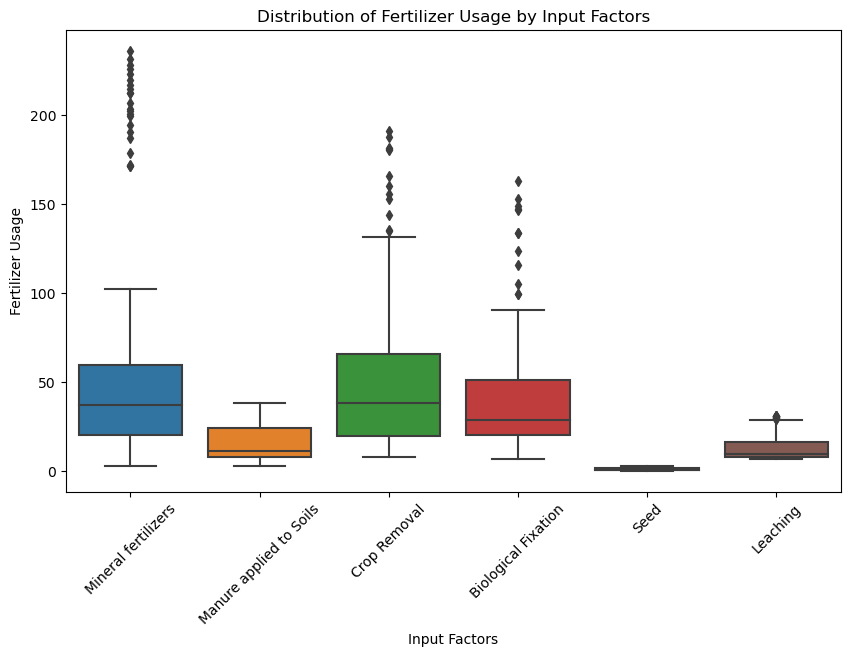

In [46]:
# Visualize Fertilizer Usage Distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='Input_Factors', y='Fertilizer_Usage_Value_kg/ha', data=Cropland_Nutrient_Balance_df)
plt.title('Distribution of Fertilizer Usage by Input Factors')
plt.xlabel('Input Factors')
plt.ylabel('Fertilizer Usage')
plt.xticks(rotation=45)
plt.show()

- There is a considerable variation in fertilizer usage across different input factors.
- The "Mineral fertilizers" and "Manure applied to soils" input factors seem to have higher fertilizer usage compared to others.
- The "Crop residual," "Biological fixation," "Seed," and "Leaching" input factors have lower fertilizer usage, with a higher presence of potential outliers.

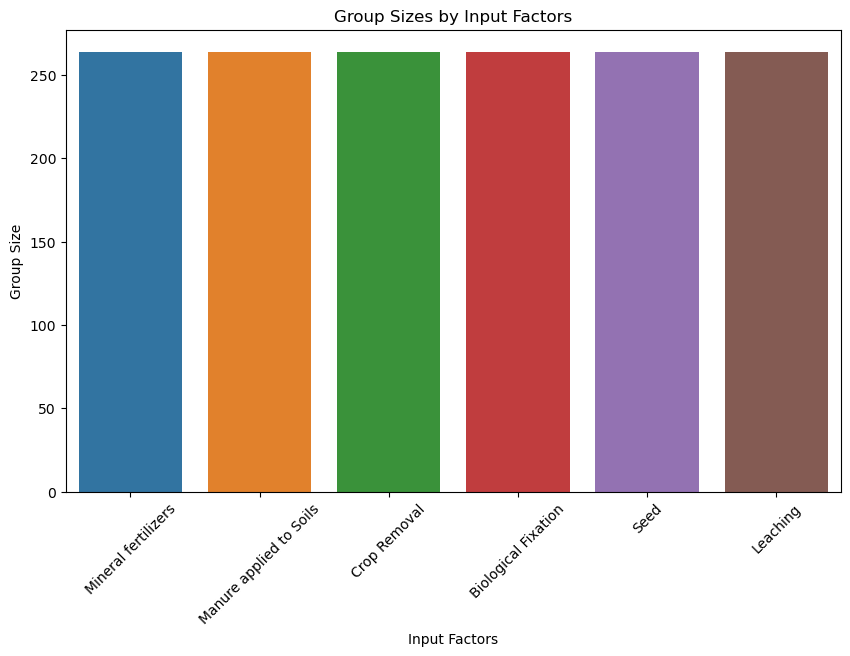

In [47]:
# Investigate Group Sizes
group_sizes = Cropland_Nutrient_Balance_df['Input_Factors'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=group_sizes.index, y=group_sizes.values)
plt.title('Group Sizes by Input Factors')
plt.xlabel('Input Factors')
plt.ylabel('Group Size')
plt.xticks(rotation=45)
plt.show()

- The group sizes for different input factors vary significantly.
- "Mineral fertilizers" and "Manure applied to soils" have the largest group sizes, followed by "Crop residual" and "Biological fixation."
- "Seed" and "Leaching" have relatively smaller group sizes.

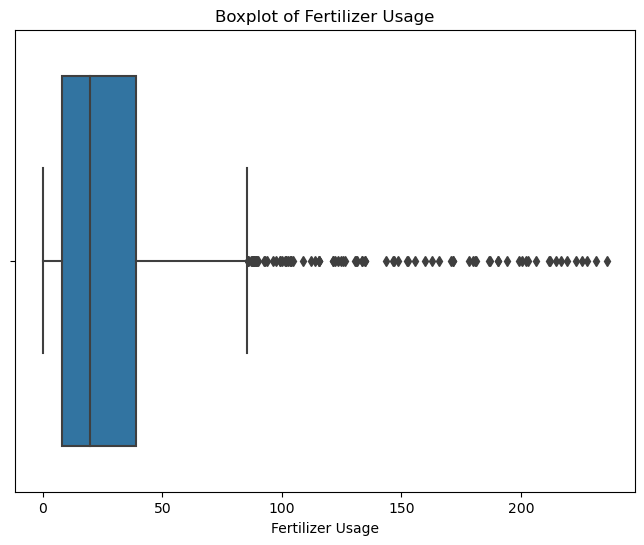

In [48]:
# Visual inspection using boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=Cropland_Nutrient_Balance_df['Fertilizer_Usage_Value_kg/ha'])
plt.title('Boxplot of Fertilizer Usage')
plt.xlabel('Fertilizer Usage')
plt.show()

- The boxplot reveals the presence of several outliers, with some extreme values in the fertilizer usage data.
- The distribution of fertilizer usage appears to be right-skewed, with a long tail towards higher values.

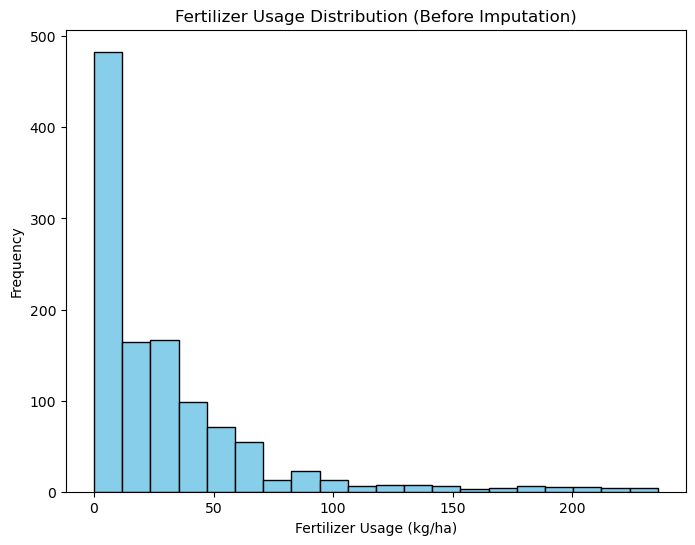

In [49]:
# Visualize distribution before imputation
plt.figure(figsize=(8, 6))
plt.hist(Cropland_Nutrient_Balance_df["Fertilizer_Usage_Value_kg/ha"].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Fertilizer Usage Distribution (Before Imputation)')
plt.xlabel('Fertilizer Usage (kg/ha)')
plt.ylabel('Frequency')
plt.show()


### *Filling Missing Data*

In [50]:
from scipy.stats.mstats import winsorize

winsorized_values = winsorize(Cropland_Nutrient_Balance_df['Fertilizer_Usage_Value_kg/ha'], 
                              limits=(0.05, 0.95))


In [51]:
# Convert the winsorized values array into a pandas Series
winsorized_series = pd.Series(winsorized_values)

In [52]:
# Fill the missing values in the original DataFrame with the winsorized values
Cropland_Nutrient_Balance_df['Fertilizer_Usage_Value_kg/ha'] = Cropland_Nutrient_Balance_df['Fertilizer_Usage_Value_kg/ha'].fillna(winsorized_series)

In [53]:
# Verify that there are no more missing values
missing_values_after_imputation = Cropland_Nutrient_Balance_df.isnull().sum()
print("Missing values after imputation:")
print(missing_values_after_imputation)

Missing values after imputation:
Country                                 0
Cropland_Nutrient_Management_Metrics    0
Input_Factors                           0
Year                                    0
Fertilizer_Usage_Value_kg/ha            0
dtype: int64


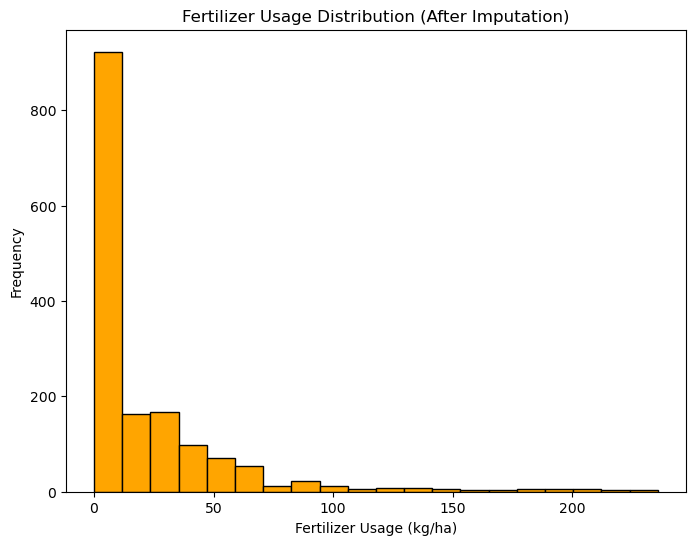

In [54]:
# Visualize distribution before imputation
plt.figure(figsize=(8, 6))
plt.hist(Cropland_Nutrient_Balance_df["Fertilizer_Usage_Value_kg/ha"].dropna(), bins=20, color='orange', edgecolor='black')
plt.title('Fertilizer Usage Distribution (After Imputation)')
plt.xlabel('Fertilizer Usage (kg/ha)')
plt.ylabel('Frequency')
plt.show()


When addressing missing values in the dataset, it's crucial to choose an appropriate imputation method that preserves the integrity of the data and minimizes the impact of missingness on subsequent analyses. In the context of our dataset, which includes the "Fertilizer_Usage_Value_kg/ha" column with missing values, we considered several imputation methods before selecting the Winsorized mean over the more common mean and median imputation techniques. Below, we provide rationale for our choice:

The distribution of fertilizer usage after imputation appears to have a more pronounced peak around 0-50 kg/ha compared to the original distribution. This could potentially indicate that the imputed values are skewing the distribution towards lower values. 

Due to the varying group sizes and potential non-normality of the fertilizer usage distribution, mean imputation and median imputation based on input factors may not be the most appropriate method.

In our dataset, the "Fertilizer_Usage_Value_kg/ha" column exhibits variability and may contain outliers due to factors such as varying agricultural practices and environmental conditions across different regions and input factors. Given the need for a robust imputation method that accounts for outliers while preserving the overall distribution of the data, we opted for Winsorized mean imputation. This approach allows us to fill missing values with estimates that are less sensitive to extreme values, resulting in more reliable imputed values for subsequent analyses.

## Merging the Data

In [55]:
merged_df = pd.merge(Crop_Production_pivot_df, Crop_Trade_pivot_df, on=['Country', 'Year','Crop_Name'], how='inner')
merged_df = pd.merge(merged_df,Emission_from_Crops_df, on=['Country', 'Year','Crop_Name'], how='inner')
merged_df = pd.merge(merged_df,Value_of_Agricultural_production_df, on=['Country', 'Year','Crop_Name'], how='inner')
merged_df = pd.merge(merged_df, Land_Use_df, on=['Country', 'Year'], how='inner')
merged_df = pd.merge(merged_df,Pesticides_Use_df, on=['Country', 'Year'], how='inner')
merged_df = pd.merge(merged_df,Cropland_Nutrient_Balance_df, on=['Country', 'Year'], how='inner')

In [56]:
merged_df.head()

,Country,Crop_Name,Year,Area harvested_ha,Production_t,Yield_100 g/ha,Export Quantity_t,Export Value_1000 USD,Import Quantity_t,Import Value_1000 USD,Emission_type,Emission_Value_kt,Gross_Production_Value_1000 USD,Area_type,Area_Value_1000 ha,Pesticide_Type,Pesticide_Value_t,Cropland_Nutrient_Management_Metrics,Input_Factors,Fertilizer_Usage_Value_kg/ha
0,Brazil,Maize (corn),2000,11890376.0,32321000.0,27182.0,6699.0,9366.0,1771194.0,201960.0,Crops total (Emissions N2O),6.4353,3568843,Land area,835814.0,Pesticides (total),141130.0,Cropland nitrogen per unit area,Mineral fertilizers,30.0631
1,Brazil,Maize (corn),2000,11890376.0,32321000.0,27182.0,6699.0,9366.0,1771194.0,201960.0,Crops total (Emissions N2O),6.4353,3568843,Land area,835814.0,Pesticides (total),141130.0,Cropland phosphorus per unit area,Mineral fertilizers,19.3971
2,Brazil,Maize (corn),2000,11890376.0,32321000.0,27182.0,6699.0,9366.0,1771194.0,201960.0,Crops total (Emissions N2O),6.4353,3568843,Land area,835814.0,Pesticides (total),141130.0,Cropland potassium per unit area,Mineral fertilizers,40.2513
3,Brazil,Maize (corn),2000,11890376.0,32321000.0,27182.0,6699.0,9366.0,1771194.0,201960.0,Crops total (Emissions N2O),6.4353,3568843,Land area,835814.0,Pesticides (total),141130.0,Cropland nitrogen per unit area,Manure applied to Soils,21.9175
4,Brazil,Maize (corn),2000,11890376.0,32321000.0,27182.0,6699.0,9366.0,1771194.0,201960.0,Crops total (Emissions N2O),6.4353,3568843,Land area,835814.0,Pesticides (total),141130.0,Cropland phosphorus per unit area,Manure applied to Soils,5.3077


In [57]:
merged_df.shape

(59076, 20)

In [58]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59076 entries, 0 to 59075
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               59076 non-null  object 
 1   Crop_Name                             59076 non-null  object 
 2   Year                                  59076 non-null  int64  
 3   Area harvested_ha                     59076 non-null  float64
 4   Production_t                          59076 non-null  float64
 5   Yield_100 g/ha                        59076 non-null  float64
 6   Export Quantity_t                     59076 non-null  float64
 7   Export Value_1000 USD                 59076 non-null  float64
 8   Import Quantity_t                     59076 non-null  float64
 9   Import Value_1000 USD                 59076 non-null  float64
 10  Emission_type                         59076 non-null  object 
 11  Emission_Value_

## Feature Engineering

In [59]:
year = merged_df['Year']

# Sinusoidal Transformation
merged_df['Year_sin'] = np.sin(2 * np.pi * year / max(year))
merged_df['Year_cos'] = np.cos(2 * np.pi * year / max(year))

# Display the modified DataFrame
print(merged_df[['Year', 'Year_sin', 'Year_cos']].head())

   Year  Year_sin  Year_cos
0  2000 -0.065242   0.99787
1  2000 -0.065242   0.99787
2  2000 -0.065242   0.99787
3  2000 -0.065242   0.99787
4  2000 -0.065242   0.99787


In [60]:
# Emission-related Interaction Features
merged_df['Emission_to_Production_ratio'] = merged_df['Emission_Value_kt'] / merged_df['Production_t']
merged_df['Emission_to_Area_ratio'] = merged_df['Emission_Value_kt'] / merged_df['Area harvested_ha']
merged_df['Emission_Value_per_Pesticide'] = merged_df['Emission_Value_kt'] / merged_df['Pesticide_Value_t']

# Land Use-related Interaction Features
merged_df['Area_to_Production_ratio'] = merged_df['Area harvested_ha'] / merged_df['Production_t']
merged_df['Area_Value_to_Pesticide_ratio'] = merged_df['Area_Value_1000 ha'] / merged_df['Pesticide_Value_t']

# Pesticide-related Interaction Features
merged_df['Pesticide_to_Production_ratio'] = merged_df['Pesticide_Value_t'] / merged_df['Production_t']

# Trade related Interaction features
merged_df['Export_to_Production_ratio'] = merged_df['Export Quantity_t'] / merged_df['Production_t']
merged_df['Import_to_Production_ratio'] = merged_df['Import Quantity_t'] / merged_df['Production_t']


In [61]:
# Compute aggregate statistics across different groups

# Mean production by country
country_production_mean = merged_df.groupby('Country')['Production_t'].mean()
merged_df['Country_Production_Mean'] = merged_df['Country'].map(country_production_mean)

# Median production by crop name
crop_production_median = merged_df.groupby('Crop_Name')['Production_t'].median()
merged_df['Crop_Production_Median'] = merged_df['Crop_Name'].map(crop_production_median)

# Sum of pesticide usage by year
yearly_pesticide_sum = merged_df.groupby('Year')['Pesticide_Value_t'].sum()
merged_df['Yearly_Pesticide_Sum'] = merged_df['Year'].map(yearly_pesticide_sum)

# Standard deviation of yield by country
country_yield_std = merged_df.groupby('Country')['Yield_100 g/ha'].std()
merged_df['Country_Yield_Std'] = merged_df['Country'].map(country_yield_std)

# Total emission value by crop name
crop_emission_total = merged_df.groupby('Crop_Name')['Emission_Value_kt'].sum()
merged_df['Crop_Emission_Total'] = merged_df['Crop_Name'].map(crop_emission_total)

In [65]:
# Dropping duplicates
merged_df.drop_duplicates(inplace=True)

In [66]:
merged_df.head()

,Country,Crop_Name,Year,Area harvested_ha,Production_t,Yield_100 g/ha,Export Quantity_t,Export Value_1000 USD,Import Quantity_t,Import Value_1000 USD,...,Area_to_Production_ratio,Area_Value_to_Pesticide_ratio,Pesticide_to_Production_ratio,Export_to_Production_ratio,Import_to_Production_ratio,Country_Production_Mean,Crop_Production_Median,Yearly_Pesticide_Sum,Country_Yield_Std,Crop_Emission_Total
0,Brazil,Maize (corn),2000,11890376.0,32321000.0,27182.0,6699.0,9366.0,1771194.0,201960.0,...,0.367884,5.922299,0.004367,0.000207,0.0548,3.514974e+07,106178315.0,3.271649e+08,13073.599468,764660.6388
1,Brazil,Maize (corn),2000,11890376.0,32321000.0,27182.0,6699.0,9366.0,1771194.0,201960.0,...,0.367884,5.922299,0.004367,0.000207,0.0548,3.514974e+07,106178315.0,3.271649e+08,13073.599468,764660.6388
2,Brazil,Maize (corn),2000,11890376.0,32321000.0,27182.0,6699.0,9366.0,1771194.0,201960.0,...,0.367884,5.922299,0.004367,0.000207,0.0548,3.514974e+07,106178315.0,3.271649e+08,13073.599468,764660.6388
3,Brazil,Maize (corn),2000,11890376.0,32321000.0,27182.0,6699.0,9366.0,1771194.0,201960.0,...,0.367884,5.922299,0.004367,0.000207,0.0548,3.514974e+07,106178315.0,3.271649e+08,13073.599468,764660.6388
4,Brazil,Maize (corn),2000,11890376.0,32321000.0,27182.0,6699.0,9366.0,1771194.0,201960.0,...,0.367884,5.922299,0.004367,0.000207,0.0548,3.514974e+07,106178315.0,3.271649e+08,13073.599468,764660.6388


In [67]:
merged_df.shape

(59076, 35)

## Feature Engineering Summary

In the feature engineering process for our machine learning project, we applied various techniques to enhance the dataset and create informative features. Here's a breakdown of the feature engineering steps:

1. **Sinusoidal Transformation of Year**: We transformed the 'Year' variable into two new features, 'Year_sin' and 'Year_cos', using a sinusoidal transformation. These features capture the cyclical nature of the year, allowing our models to account for seasonal patterns.

2. **Interaction Features**: We created several interaction features to capture relationships between different variables. These included emission-related, land use-related, pesticide-related, and trade-related interaction features. These interactions help incorporate the combined effects of multiple variables into our analysis.

3. **Aggregate Statistics**: We computed aggregate statistics across different groups in the dataset. For example, we calculated the mean production by country, median production by crop name, sum of pesticide usage by year, standard deviation of yield by country, and total emission value by crop name. These aggregate statistics provide additional insights into the dataset and can be useful for modeling purposes.

By performing these feature engineering steps, we enriched our dataset with new information and transformed existing variables to better capture the underlying patterns and relationships. These engineered features can potentially improve the performance of our machine learning models and enhance the interpretability of our analysis.

If further adjustments or additional feature engineering steps are needed, we can iteratively refine our approach based on the insights gained from exploratory data analysis (EDA) and model evaluation.

In [63]:
merged_df.to_csv('merged_file.csv', index=False)